In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Online Retail.csv'

## **1. Data Cleaning**

In [5]:
my_data = pd.read_csv(file_path, sep = ',', encoding='latin1')
my_data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [6]:
# Add feature
my_data['InvoiceDate'] = pd.to_datetime(my_data['InvoiceDate'])
my_data['Year'] = my_data['InvoiceDate'].dt.year
my_data['Quarter'] = my_data['InvoiceDate'].dt.quarter
my_data['Month'] = my_data['InvoiceDate'].dt.month
my_data['Total Revenue'] = my_data['Quantity']*my_data['UnitPrice']

#Clean data
my_data = my_data[~my_data['CustomerID'].isna()]
my_data['CustomerID'] = my_data['CustomerID'].astype('int')
my_data = my_data[~my_data['Description'].isna()]
my_data = my_data[my_data['Quantity'] > 0]
my_data.head()

<ipython-input-6-c46c1f6ecb8b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  my_data['InvoiceDate'] = pd.to_datetime(my_data['InvoiceDate'])
<ipython-input-6-c46c1f6ecb8b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['CustomerID'] = my_data['CustomerID'].astype('int')


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Quarter  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  2010        4   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010        4   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  2010        4   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010        4   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010        4   

   Month  Total Revenue  
0     12          15.30  
1     12          20.34  
2     12          22.00  
3     12          20.34  
4     12          20.34

In [7]:
my_data.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceDate      datetime64[ns]
UnitPrice               float64
CustomerID                int64
Country                  object
Year                      int32
Quarter                   int32
Month                     int32
Total Revenue           float64
dtype: object

In [8]:
my_data[my_data['UnitPrice'] ==0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
9302   2010-12-05 14:02:00        0.0       12647         Germany  2010   
33576  2010-12-16 14:36:00        0.0       16560  United Kingdom  2010   
40089  2010-12-21 13:45:00        0.0       14911            EIRE  2010   
47068  2011-01-06 16:41:00        0.0       13081  United Kingdom  2011   
47070  2011-01-06 16:41:00        0.0       13081  United Kingdom  2011   
56674  2011-01-13 15:10:00        0.0       15107  United Kingdom  2011   
86789  2011-02-10 13:08:00        0.0       17560  United Kingdom  2011   
130188 2011-03-23 10:25:00        0.0       13239  United Kingdom  2011   
139453 2011-03-30 12:45:00        0.0       13113  United Kingdom  2011   
145208 2011-04-04 14:42:00        0.0       14410  United Kingdom  2011   
157042 2011-04-14 18:57:

In [9]:
my_data.shape

(397924, 12)

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397924 non-null  object        
 1   StockCode      397924 non-null  object        
 2   Description    397924 non-null  object        
 3   Quantity       397924 non-null  int64         
 4   InvoiceDate    397924 non-null  datetime64[ns]
 5   UnitPrice      397924 non-null  float64       
 6   CustomerID     397924 non-null  int64         
 7   Country        397924 non-null  object        
 8   Year           397924 non-null  int32         
 9   Quarter        397924 non-null  int32         
 10  Month          397924 non-null  int32         
 11  Total Revenue  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 34.9+ MB


In [11]:
my_data.isna().sum() #Kiểm tra NaN

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Year             0
Quarter          0
Month            0
Total Revenue    0
dtype: int64

In [12]:
my_data[my_data.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
517    2010-12-01 11:45:00       1.25       17908  United Kingdom  2010   
527    2010-12-01 11:45:00       2.10       17908  United Kingdom  2010   
537    2010-12-01 11:45:00       2.95       17908  United Kingdom  2010   
539    2010-12-01 11:45:00       4.95       17908  United Kingdom  2010   
555    2010-12-01 11:49:00       2.95       17920  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
541675 2011-12-09 11:34:00       0.39       14446  United Kingdom  2011   
541689 2011-12-09 11:34:00       2.49       14446  United Kingdom  2011   
541692 2011-12-09 11:34:00       1.95       14446  United Kingdom  2011   
541699 2011-12-09 11:34:00       2.10       14446  United Kingdom  2011   
541701 2011-12-09 11:34:00       2.08       14446  United Kingdom  2011   

        Quarter  Month  Total Revenue  
517           4     12           1.25  
527           4     12           2.10  
537           4     12           2.95  
539           4     12           4.95  
555           4     12           2.95  
...         ...    ...            ...  
541675        4     12           0.39  
541689        4     12           2.49  
541692        4     12           1.95  
541699        4     12           2.10  
541701        4     12           2.08  

[5192 rows x 12 columns]

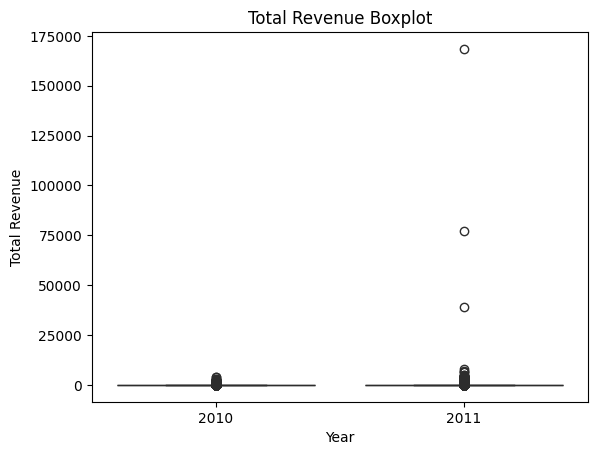

In [13]:
sns.boxplot(x=my_data['Year'], y=my_data['Total Revenue'], color='#682F2F')
plt.title('Total Revenue Boxplot')
plt.show()

In [14]:
my_data.select_dtypes(include = ['int','float']).describe()

Quantity      UnitPrice     CustomerID           Year  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean       13.021823       3.116174   15294.315171    2010.934259   
std       180.420210      22.096788    1713.169877       0.247829   
min         1.000000       0.000000   12346.000000    2010.000000   
25%         2.000000       1.250000   13969.000000    2011.000000   
50%         6.000000       1.950000   15159.000000    2011.000000   
75%        12.000000       3.750000   16795.000000    2011.000000   
max     80995.000000    8142.750000   18287.000000    2011.000000   

             Quarter          Month  Total Revenue  
count  397924.000000  397924.000000  397924.000000  
mean        2.856106       7.612537      22.394749  
std         1.121873       3.416527     309.055588  
min         1.000000       1.000000       0.000000  
25%         2.000000       5.000000       4.680000  
50%         3.000000       8.000000      11.800000  
75%         4.000000      11.000000      19.800000  
max         4.000000      12.000000  168469.600000

# **2. EDA**

In [15]:
my_data['Country'].value_counts()

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Czech Republic              25
Bahrain                     17
Saudi Arabia                 9
Name: count, dtype: int64

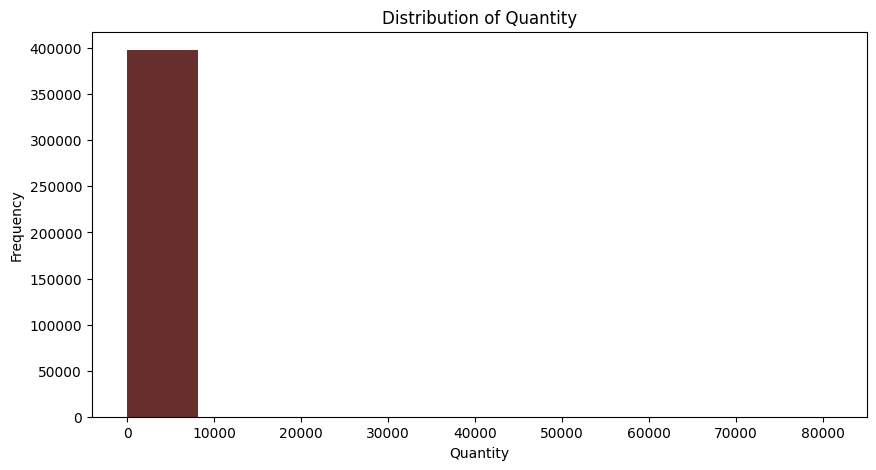

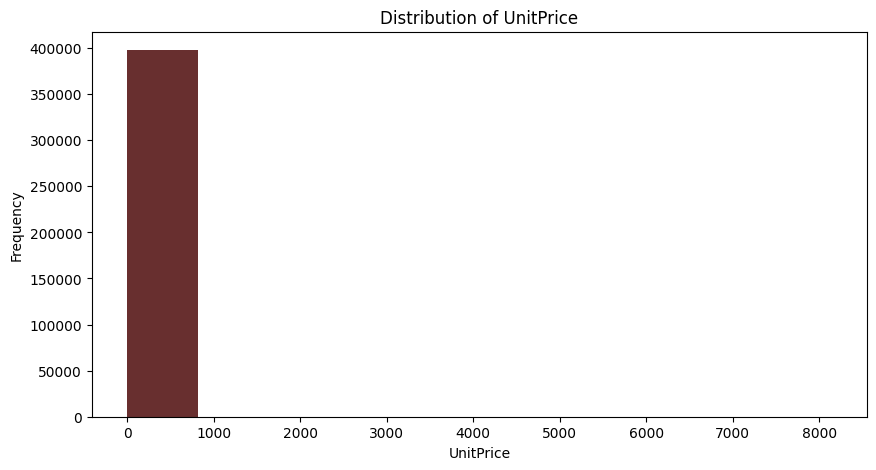

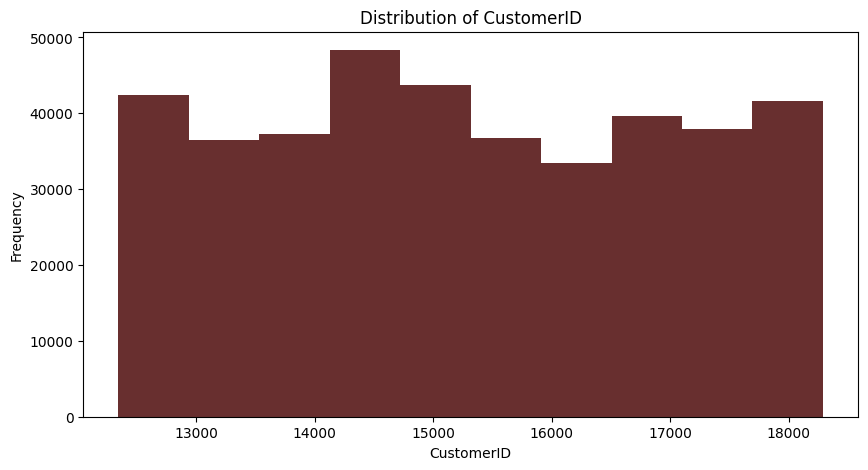

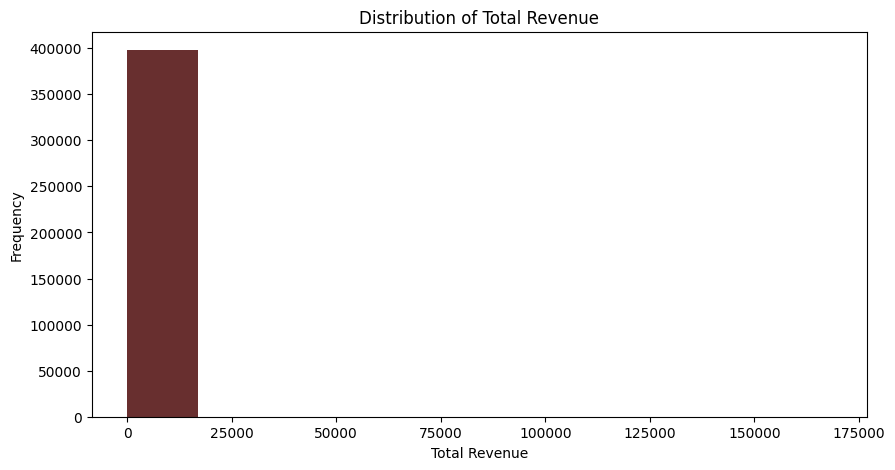

In [16]:
numeric_columns = my_data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(my_data[column], color='#682F2F')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

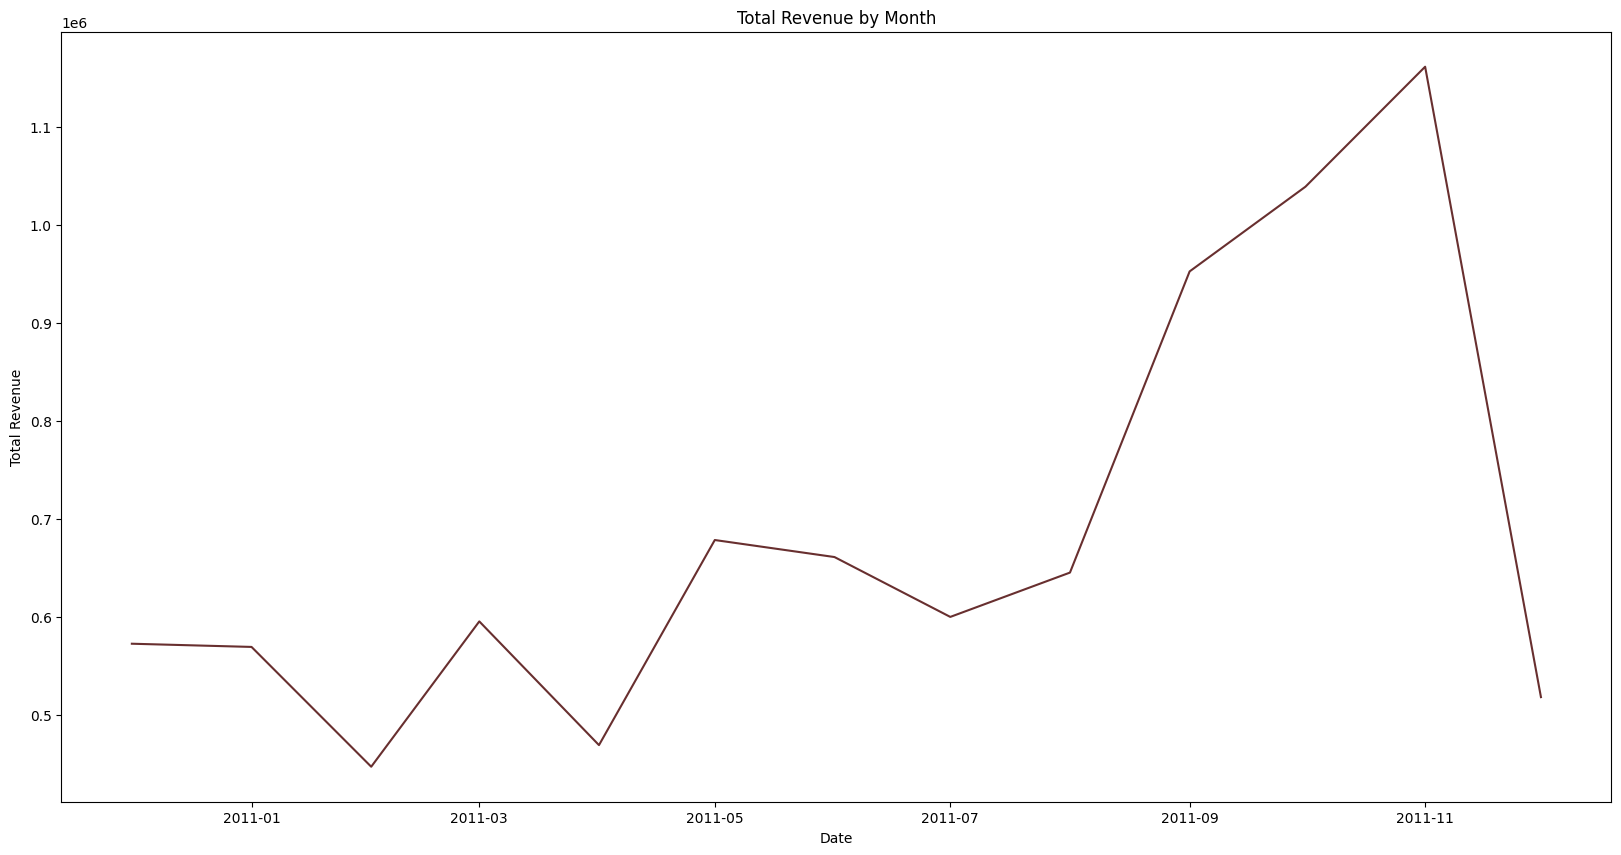

In [17]:
plt.figure(figsize = (20, 10))
rev_by_month = my_data.groupby(['Year','Month']).agg({'Total Revenue':'sum'}).reset_index()
rev_by_month = pd.DataFrame(rev_by_month)
rev_by_month['Date'] = pd.to_datetime(rev_by_month[['Year', 'Month']].assign(DAY=1))

# Drop the now redundant Year and Month columns
rev_by_month.drop(columns=['Year', 'Month'], inplace=True)

# Plot the line chart
sns.lineplot(data = rev_by_month, x = 'Date', y = 'Total Revenue', color='#682F2F')
plt.title('Total Revenue by Month')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

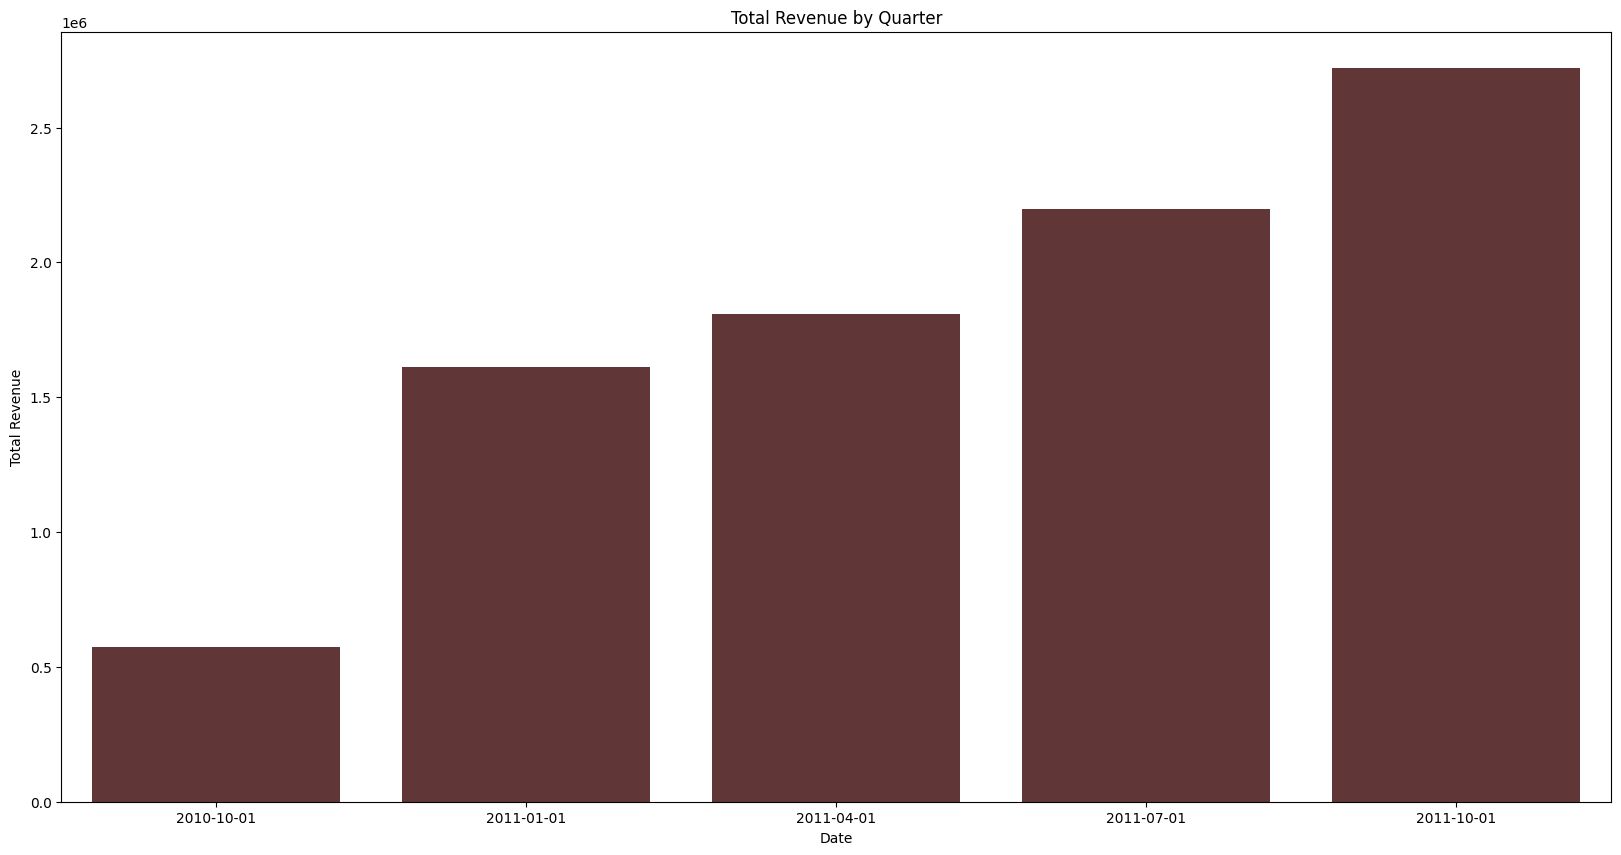

In [18]:
plt.figure(figsize = (20, 10))
rev_by_quarter = my_data.groupby(['Year','Quarter']).agg({'Total Revenue':'sum'}).reset_index()
rev_by_quarter = pd.DataFrame(rev_by_quarter)

# Map quarters to the first month of each quarter
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
rev_by_quarter['Month'] = rev_by_quarter['Quarter'].map(quarter_to_month)

# Combine Year and Month into a single column and convert to datetime
rev_by_quarter['Date'] = pd.to_datetime(rev_by_quarter[['Year', 'Month']].assign(DAY=1))

# Drop the now redundant Year, Quarter, and Month columns
rev_by_quarter.drop(columns=['Year', 'Quarter', 'Month'], inplace=True)
# Plot the line chart
sns.barplot(data = rev_by_quarter, x = 'Date', y = 'Total Revenue', color='#682F2F')
plt.title('Total Revenue by Quarter')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

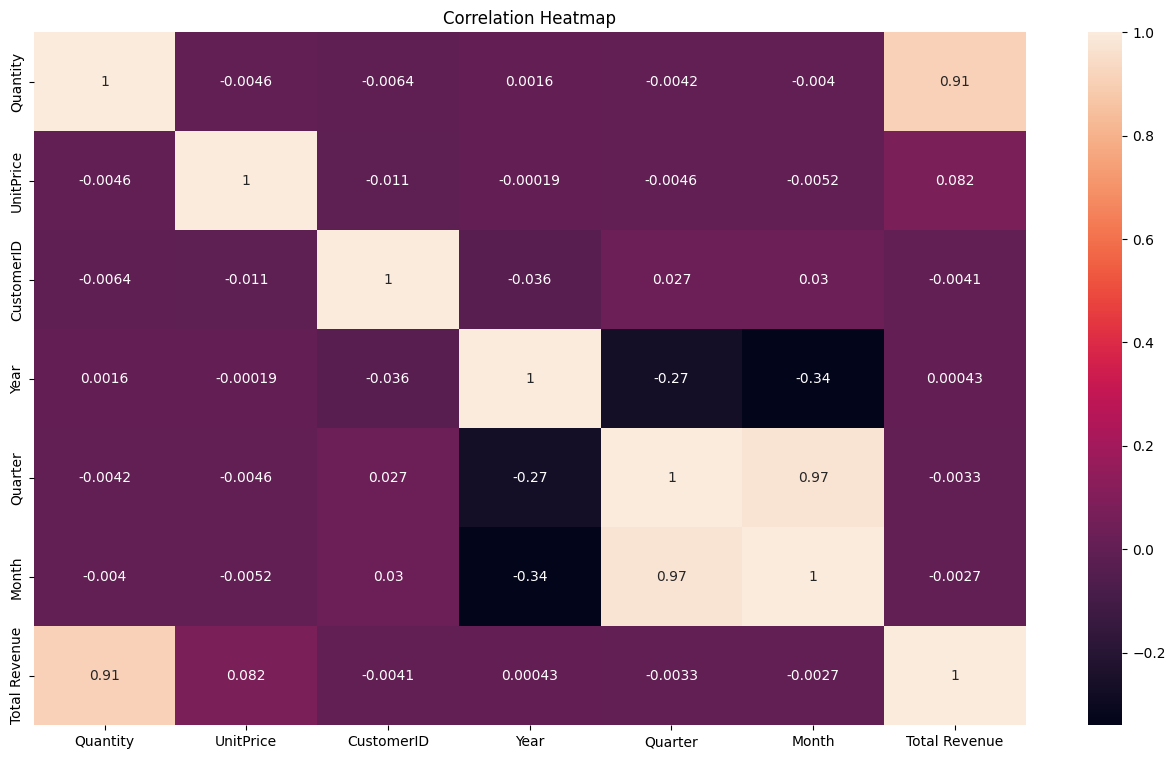

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(my_data.select_dtypes(include = ['int', 'float']).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **3. Product Analysis**


## **Best selling product**

In [20]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

/bin/bash: line 1: conda: command not found


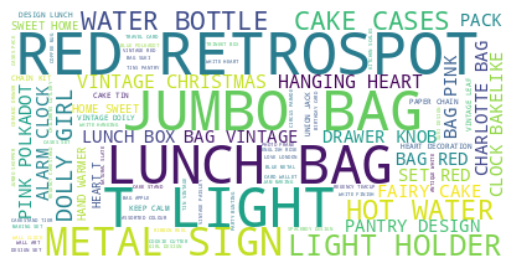

In [21]:
from wordcloud import WordCloud, STOPWORDS


# Extract the 'Description' column
pro_data = my_data['Description'].astype(str)  # Convert the column to string type

stopwords = set(STOPWORDS)

# instantiate a word cloud object
pro_data_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
pro_data_wc.generate(' '.join(pro_data)) # WordCloud expects a single string

# display the word cloud
plt.imshow(pro_data_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
from collections import Counter

In [23]:
# Extract the frequencies of words
word_freq = pro_data_wc.process_text(' '.join(pro_data))

# Sort and display the most common words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 most common words
print("Top 10 most common words:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 most common words:
RED RETROSPOT: 14545
T LIGHT: 12693
JUMBO BAG: 12464
LUNCH BAG: 11556
METAL SIGN: 9723
LIGHT HOLDER: 8748
HOT WATER: 7206
WATER BOTTLE: 7206
CAKE CASES: 7164
DOLLY GIRL: 5375


In [24]:
pro_abo1000 = my_data['Description'].value_counts() >= 1000
pro_abo100_analysis = my_data['Description'].value_counts()[pro_abo1000]
pro_abo100_analysis

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
SPOTTY BUNTING                        1017
LUNCH BAG SPACEBOY DESIGN             1008
Name: count, dtype: int64

In [25]:
pro_country = my_data.pivot_table(index='Country',
                          values='InvoiceNo',
                          aggfunc='count').reset_index()
pro_country.rename(columns={'InvoiceNo':'Total Orders'}, inplace=True)
pro_country.head()

Country  Total Orders
0  Australia          1185
1    Austria           398
2    Bahrain            17
3    Belgium          2031
4     Brazil            32

## **Total Orders by Country**

In [26]:
import plotly.express as px

# Build the map
fig = px.choropleth(pro_country,
                    locations="Country",
                    locationmode='country names',
                    color="Total Orders",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(
    title={
        'text': "World Map by Country Name",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

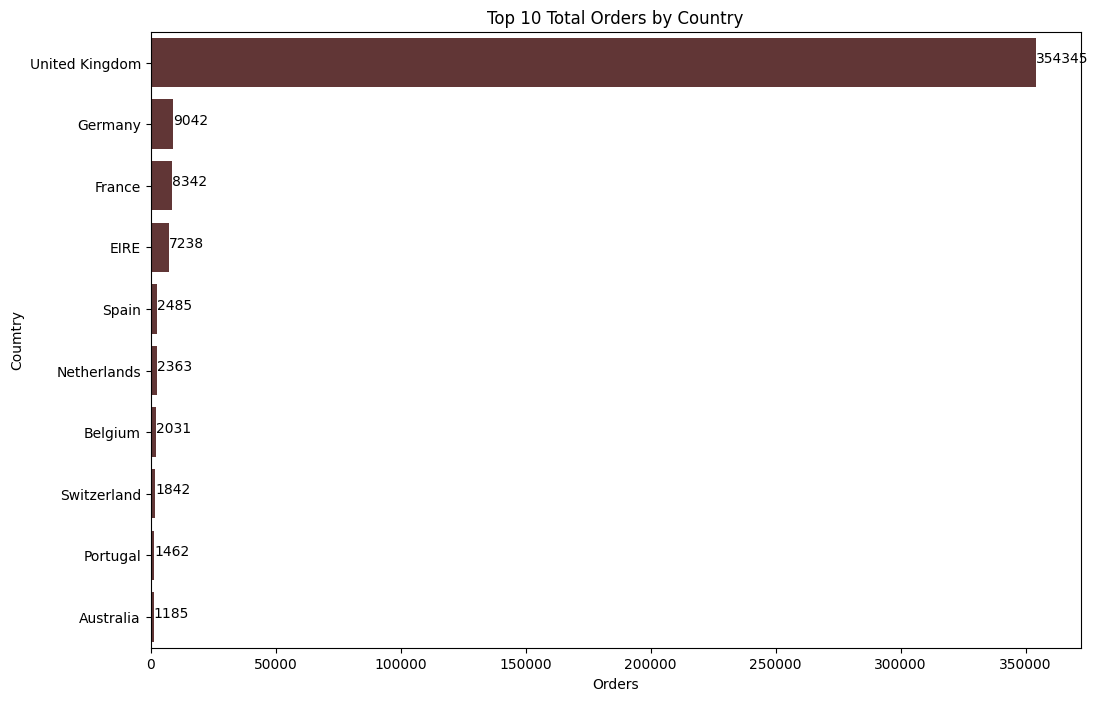

In [27]:
pro_country_top5 = pro_country.sort_values(by='Total Orders', ascending=False, inplace=True)
pro_country_top5 = pro_country.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Orders', y='Country', data=pro_country_top5, orient='h', color='#682F2F')

plt.xlabel('Orders')
plt.ylabel('Coumtry')
plt.title('Top 10 Total Orders by Country')
for index, value in enumerate(pro_country_top5['Total Orders']):
    plt.text(value, index, str(value))
plt.show()

In [28]:
my_data.groupby(['Country']).agg({'InvoiceNo':'count',
                                  'Total Revenue':'mean'}).sort_values(by='InvoiceNo', ascending=False).reset_index()

Country  InvoiceNo  Total Revenue
0         United Kingdom     354345      20.625073
1                Germany       9042      25.311562
2                 France       8342      25.056827
3                   EIRE       7238      36.687745
4                  Spain       2485      24.779521
5            Netherlands       2363     120.798282
6                Belgium       2031      20.283772
7            Switzerland       1842      30.642752
8               Portugal       1462      22.872702
9              Australia       1185     116.895620
10                Norway       1072      33.736418
11                 Italy        758      23.064960
12       Channel Islands        748      27.340160
13               Finland        685      32.913985
14                Cyprus        614      22.134169
15                Sweden        451      85.096075
16               Austria        398      25.624824
17               Denmark        380      49.882474
18                Poland        330      22.226212
19                 Japan        321     116.561900
20                Israel        248      29.119718
21           Unspecified        244      10.930615
22             Singapore        222      95.852658
23               Iceland        182      23.681319
24                   USA        179      20.002179
25                Canada        151      24.280662
26                Greece        145      32.831172
27                 Malta        112      24.335625
28  United Arab Emirates         68      27.974706
29    European Community         60      21.670833
30                   RSA         58      17.281207
31               Lebanon         45      37.641778
32             Lithuania         35      47.458857
33                Brazil         32      35.737500
34        Czech Republic         25      33.069600
35               Bahrain         17      32.258824
36          Saudi Arabia          9      16.213333

# **4. Customer Analysis**


## **Cohort Analysis (Customer Retention)**

In [42]:
# Define the get_date_int function
def get_date_int(df, column):
    df[column] = pd.to_datetime(df[column])
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
    # Extract the integers for date parts from the `InvoiceDay` column

In [43]:
def get_day(x):
    """
    Extract the day from a datetime object.

    Parameters:
    x (datetime): A datetime object from which to extract the day.

    Returns:
    datetime: The date component (year, month, day) of the datetime.
    """
    return x.date()  # Extracts the date part (year, month, day)

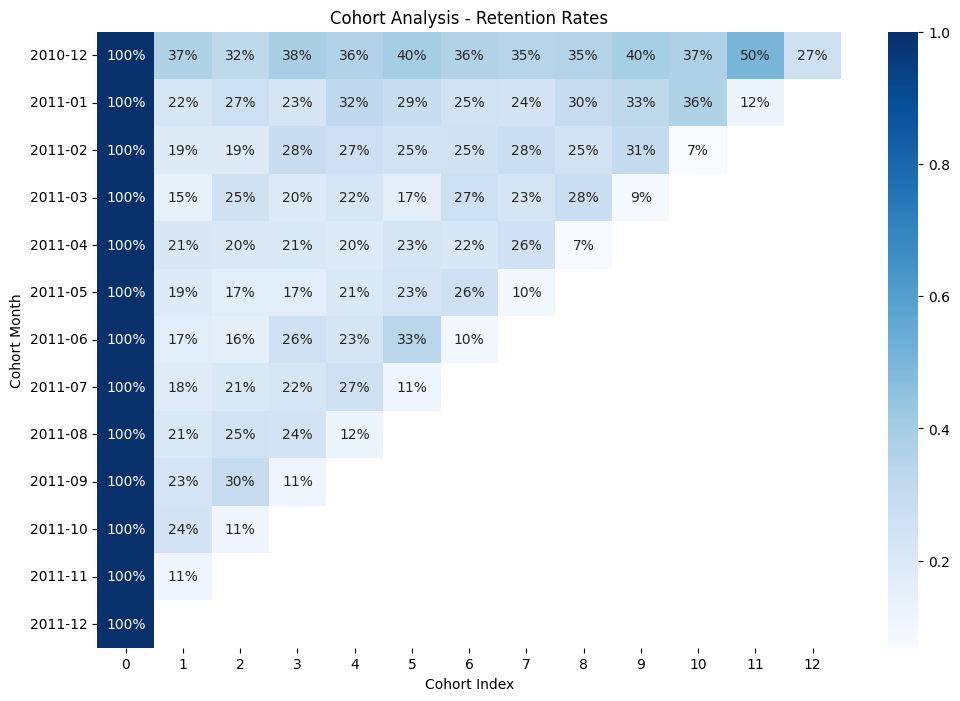

In [45]:
# Create InvoiceDay column
my_data['InvoiceDay'] = my_data['InvoiceDate'].apply(get_day)

# Group by CustomerID and select the InvoiceDay value
grouping_cus = my_data.groupby('CustomerID')['InvoiceDay']

# Assign a minimum InvoiceDay value to the dataset
my_data['CohortDay'] = grouping_cus.transform('min')

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(my_data, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(my_data, 'CohortDay')

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
my_data['CohortIndex'] = years_diff * 12 + months_diff

# Add a cohort month column to identify the cohort group each customer belongs to
my_data['CohortMonth'] = my_data['CohortDay'].apply(lambda x: x.strftime('%Y-%m'))

# Create a pivot table to summarize the cohort data
cohort_data_cus = my_data.groupby(['CohortMonth', 'CohortIndex']).agg({
    'CustomerID': pd.Series.nunique
}).reset_index()

# Pivot the data to create a matrix of cohorts and periods
cohort_pivot_cus = cohort_data_cus.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Calculate retention rates
cohort_size = cohort_pivot_cus.iloc[:,0]
retention_matrix = cohort_pivot_cus.divide(cohort_size, axis=0)

# Plot the retention matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

## **Customer Segmentation**

In [46]:
snapshot_date = my_data['InvoiceDate'].max() + dt.timedelta(days=1)

rfm_data = my_data[my_data['Total Revenue'] > 0].groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total Revenue': 'sum'})


rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total Revenue': 'MonetaryValue'}, inplace=True)

rfm_data.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2        182        4310.00
12348            75         31        1797.24
12349            19         73        1757.55
12350           310         17         334.40

In [47]:
rfm_data.describe()

Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     92.536422    91.720609    2054.266460
std     100.014169   228.785094    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     307.415000
50%      51.000000    41.000000     674.485000
75%     142.000000   100.000000    1661.740000
max     374.000000  7847.000000  280206.020000

In [48]:
from scipy.stats import skew, norm, probplot, boxcox
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




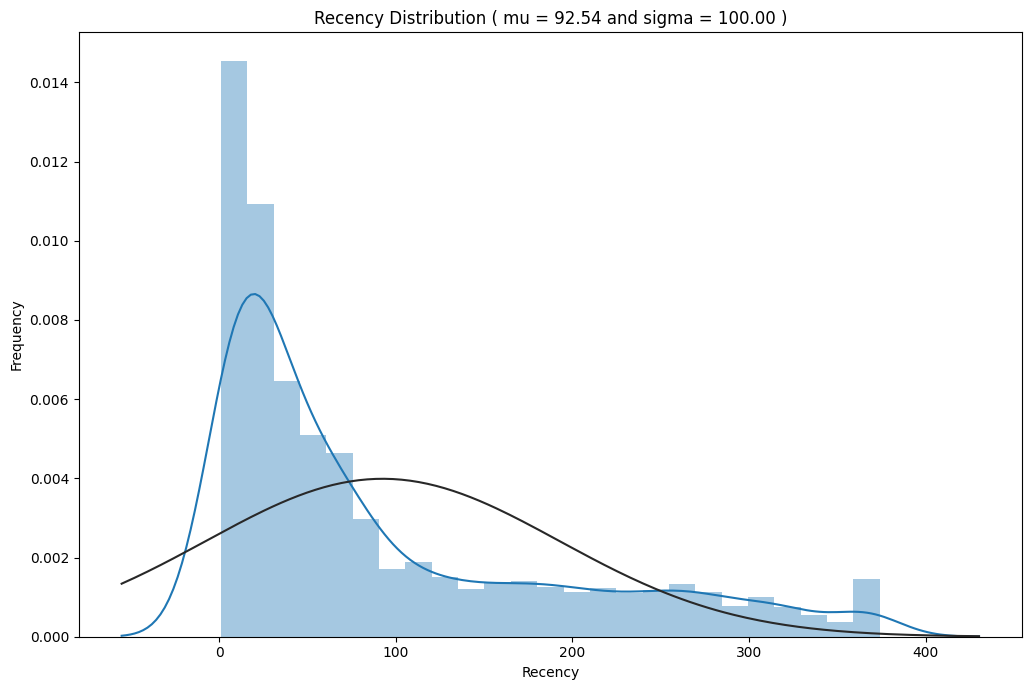

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




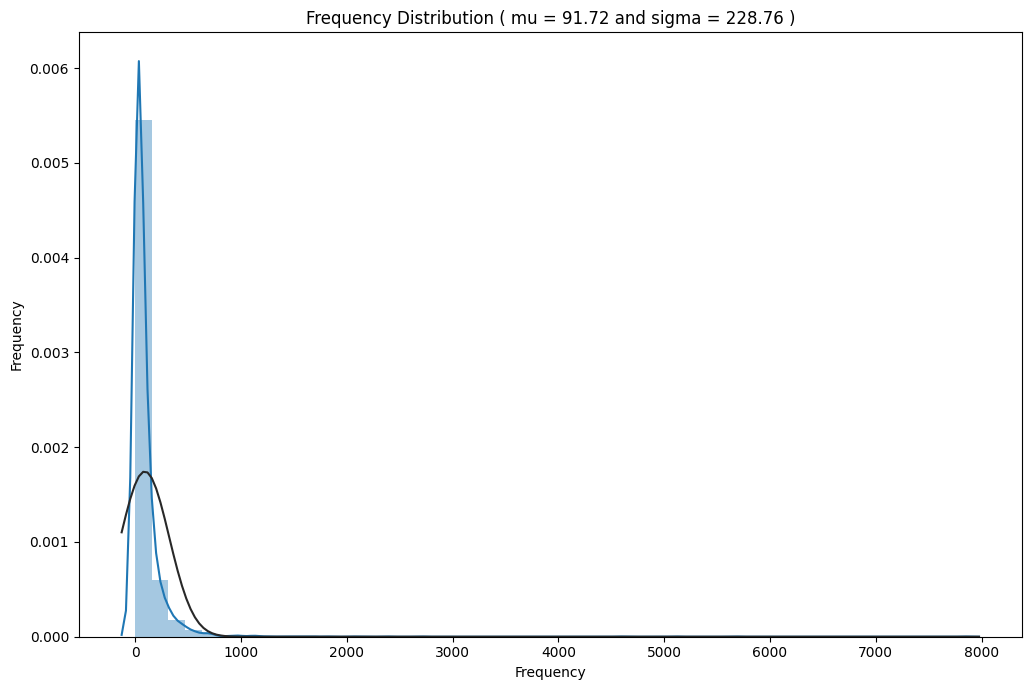

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




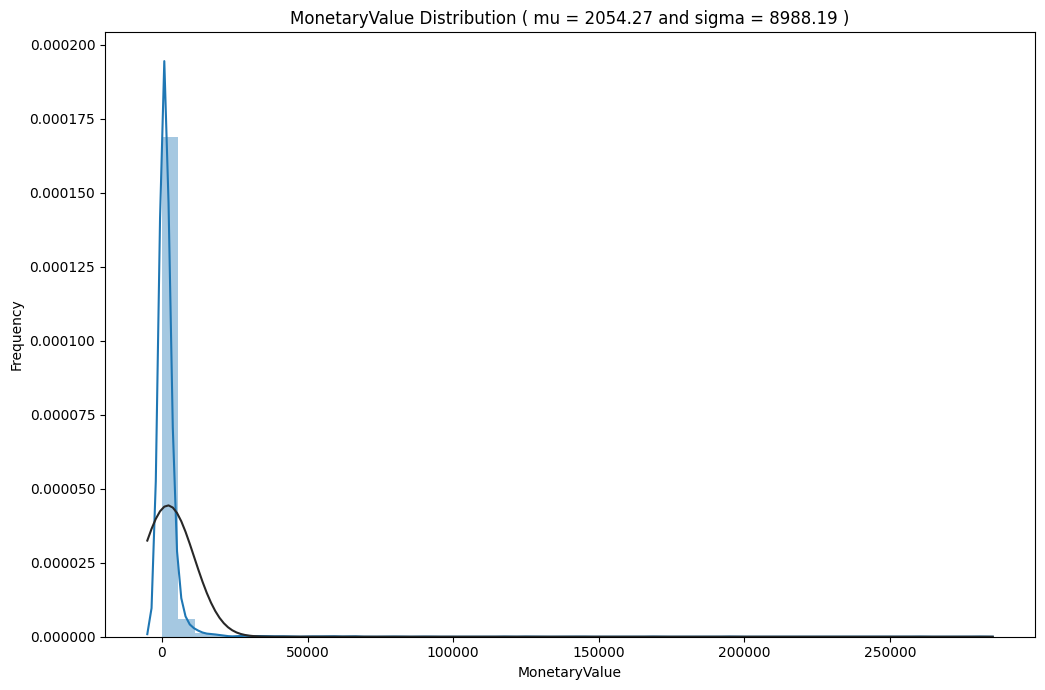

In [49]:
QQ_plot(rfm_data['Recency'], 'Recency')
QQ_plot(rfm_data['Frequency'], 'Frequency')
QQ_plot(rfm_data['MonetaryValue'], 'MonetaryValue')

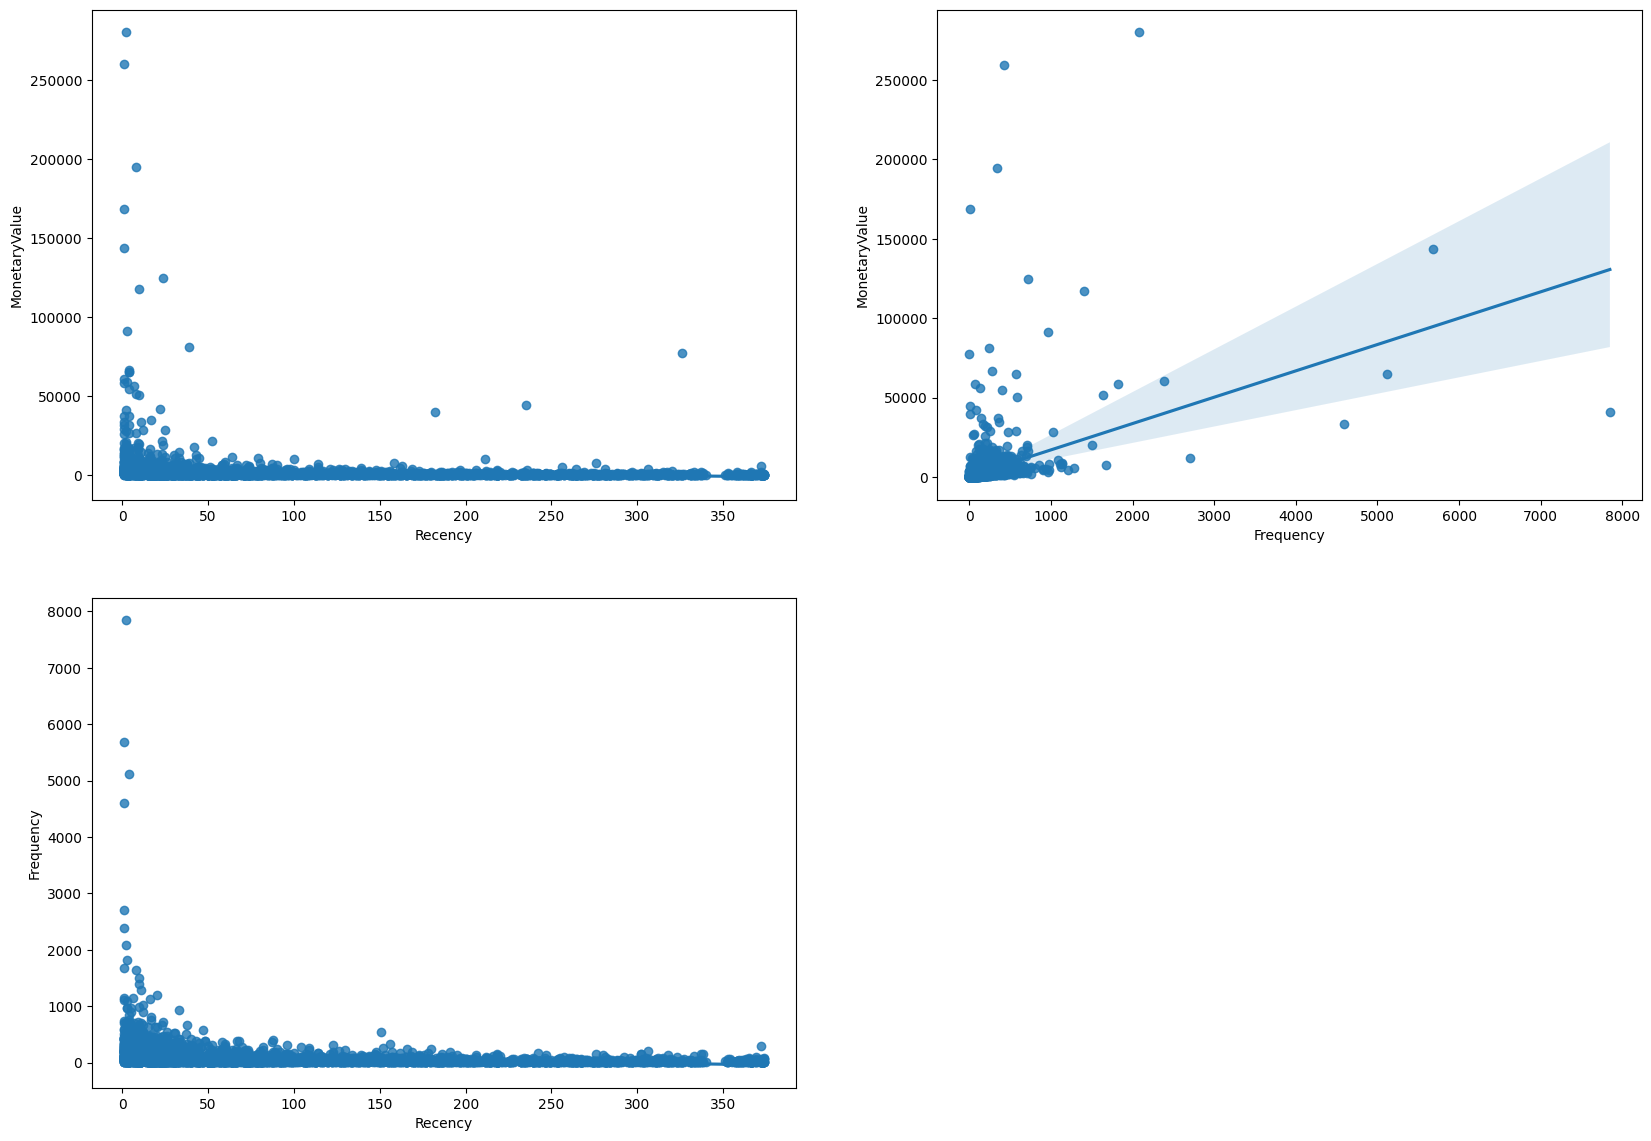

<Figure size 1500x1000 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='MonetaryValue', data=rfm_data)
f1 = fig.add_subplot(222); sns.regplot(x='Frequency', y='MonetaryValue', data=rfm_data)
f1 = fig.add_subplot(223); sns.regplot(x='Recency', y='Frequency', data=rfm_data)

fig = plt.figure(figsize=(15, 10))

plt.show()

In [51]:
rfm_data_log = np.log(rfm_data)
# Initialize a standard scaler and fit it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_data_log)
# Scale and center the data
rfm_data_normalized = scaler.transform(rfm_data_log)

# Create a pandas DataFrame
rfm_data_normalized = pd.DataFrame(data=rfm_data_normalized, index=rfm_data.index, columns=rfm_data.columns)
rfm_data_normalized.head()

Recency  Frequency  MonetaryValue
CustomerID                                    
12346       1.409894  -2.775160       3.698719
12347      -2.146498   1.149549       1.410201
12348       0.383971  -0.185347       0.716419
12349      -0.574674   0.460579       0.698706
12350       1.374758  -0.638433      -0.617446

In [52]:
rfm_data_normalized.describe()

Recency     Frequency  MonetaryValue
count  4.338000e+03  4.338000e+03   4.338000e+03
mean  -1.048288e-16 -9.172520e-17  -7.010426e-16
std    1.000115e+00  1.000115e+00   1.000115e+00
min   -2.630445e+00 -2.775160e+00  -4.179280e+00
25%   -6.124235e-01 -6.384332e-01  -6.841832e-01
50%    1.147066e-01  2.550746e-02  -6.094235e-02
75%    8.296516e-01  6.979246e-01   6.542440e-01
max    1.505796e+00  3.988157e+00   4.721395e+00

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




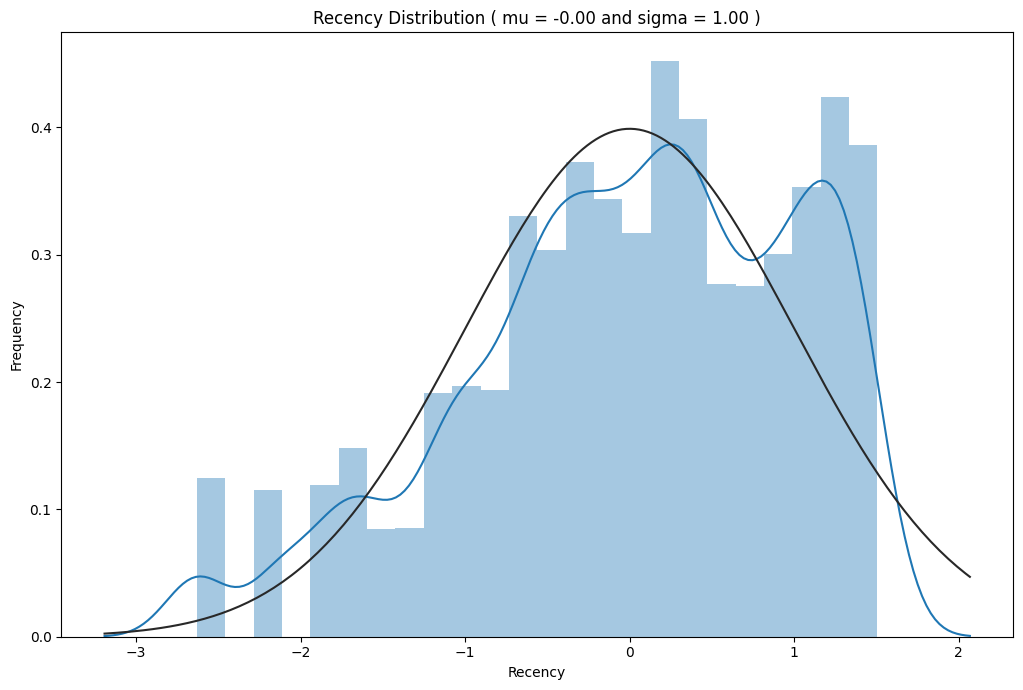

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




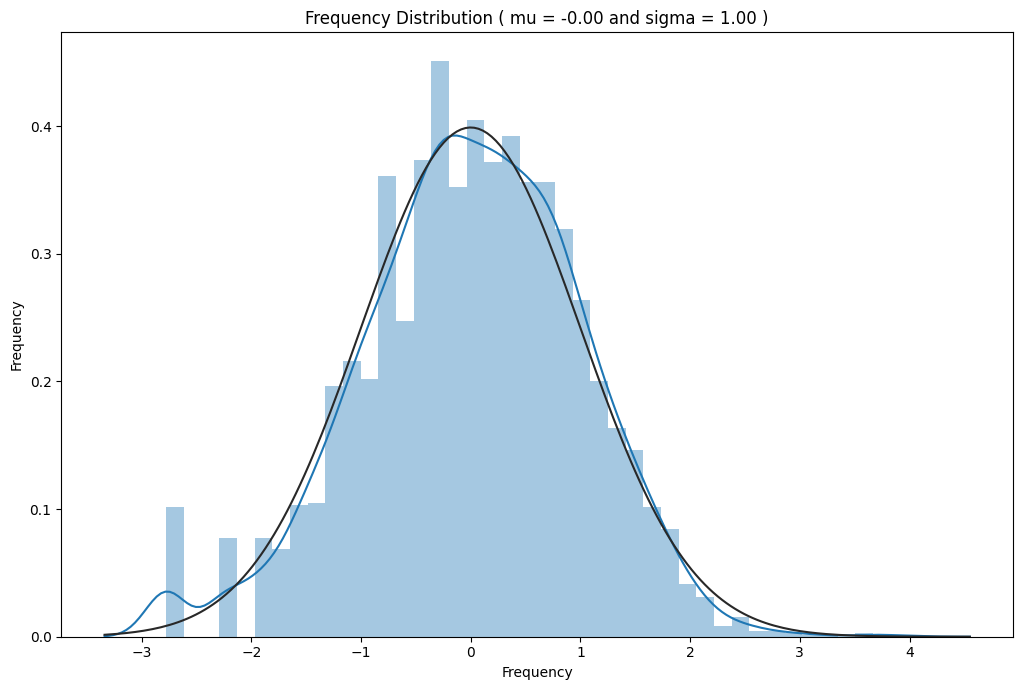

<ipython-input-48-9f2f273f1e02>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




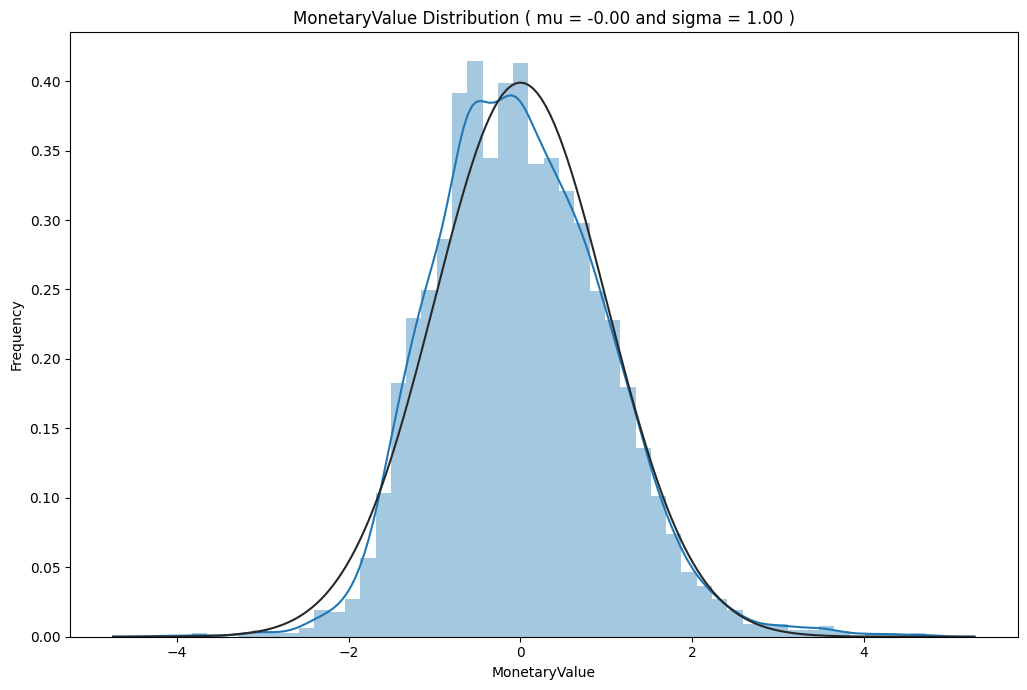

In [53]:
QQ_plot(rfm_data_normalized['Recency'], 'Recency')
QQ_plot(rfm_data_normalized['Frequency'], 'Frequency')
QQ_plot(rfm_data_normalized['MonetaryValue'], 'MonetaryValue')

### **Cluster**

In [54]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
sse = {}

### **Elbow**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

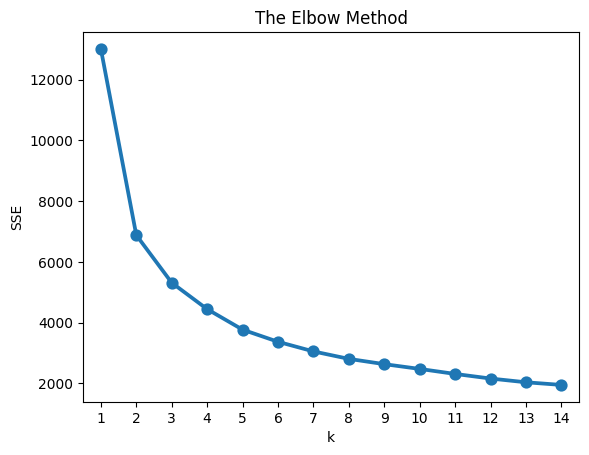

In [55]:
sse ={}
for k in range(1, 15):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(rfm_data_normalized)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

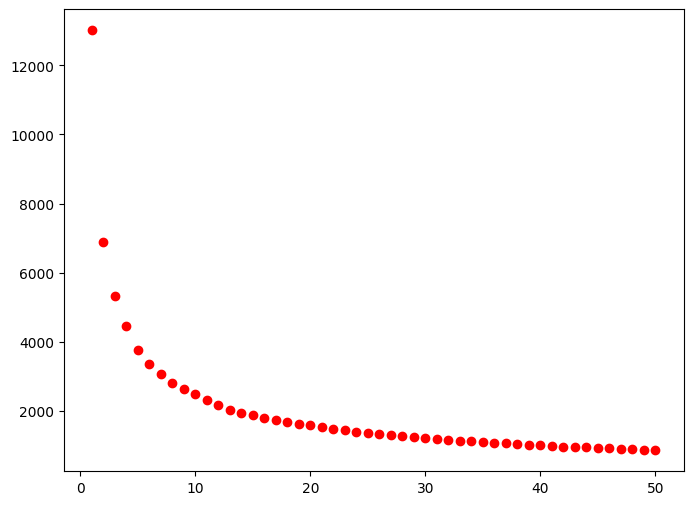

The best K sugest:  8


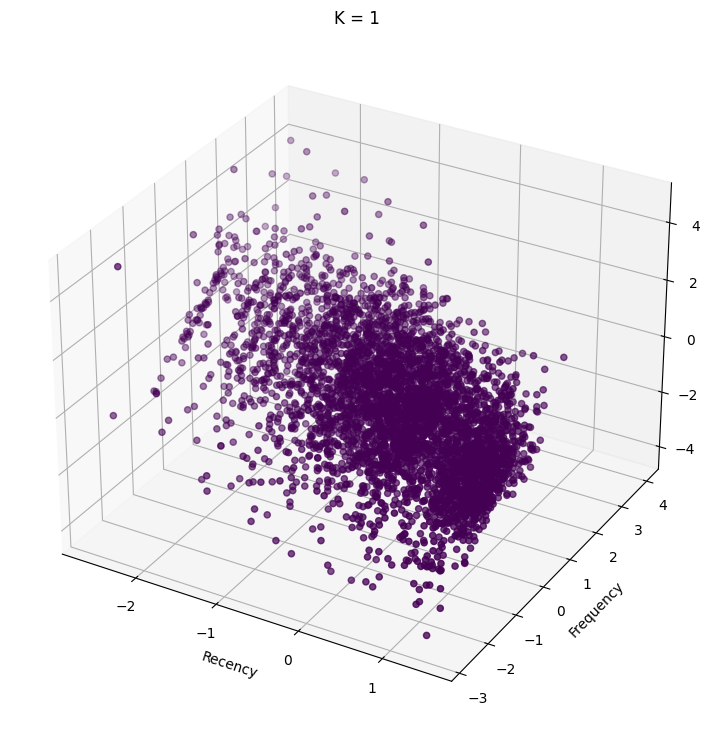

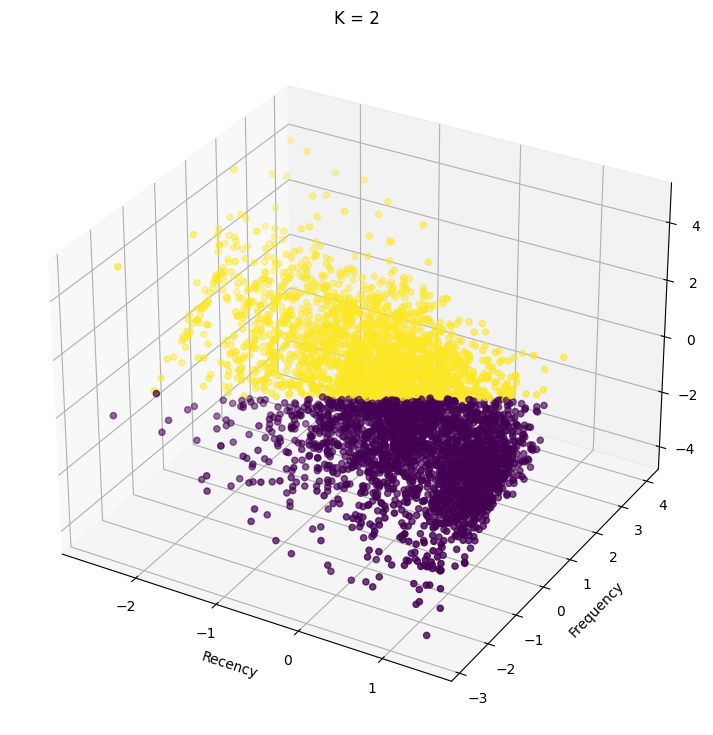

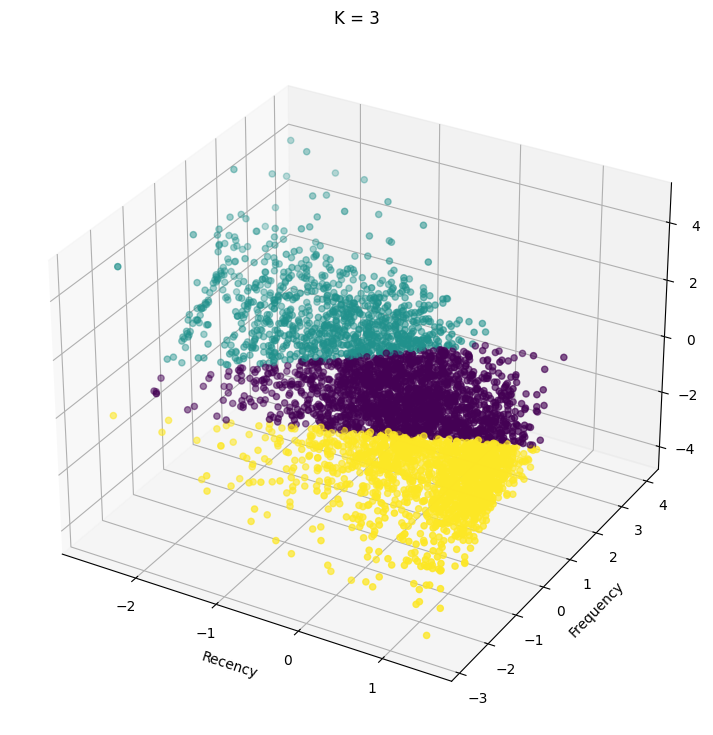

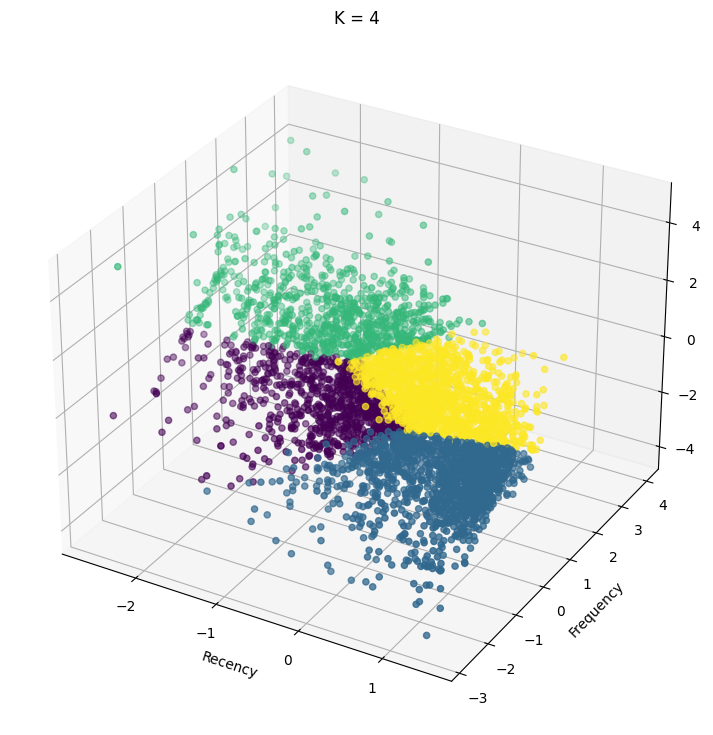

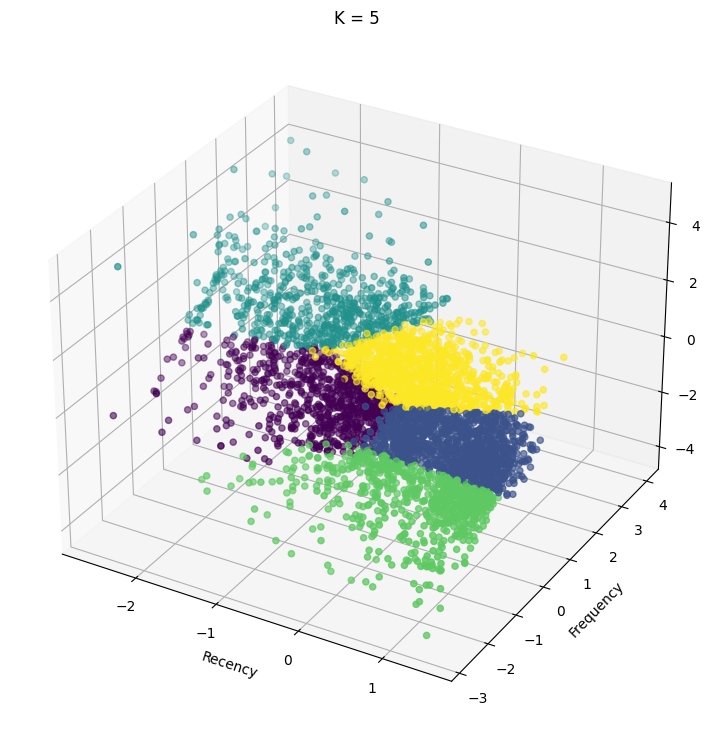

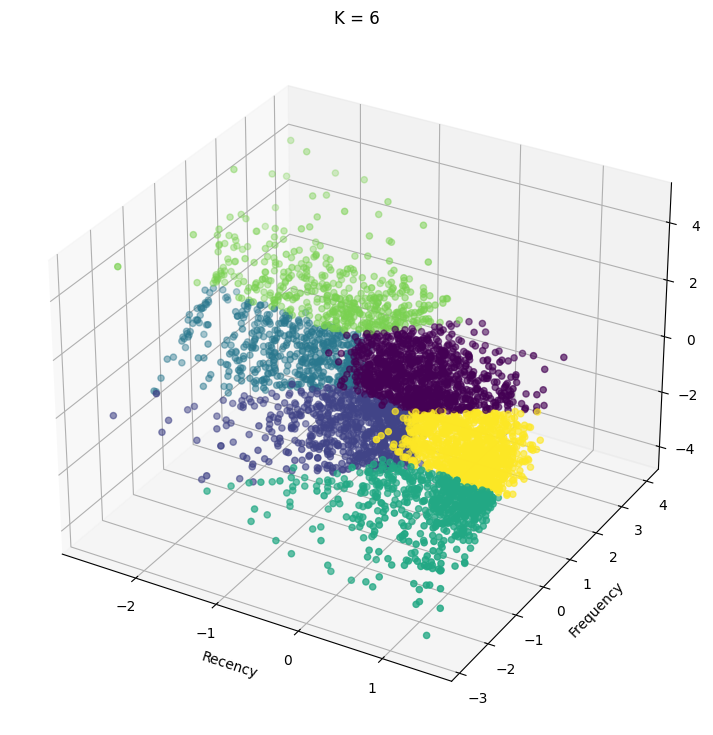

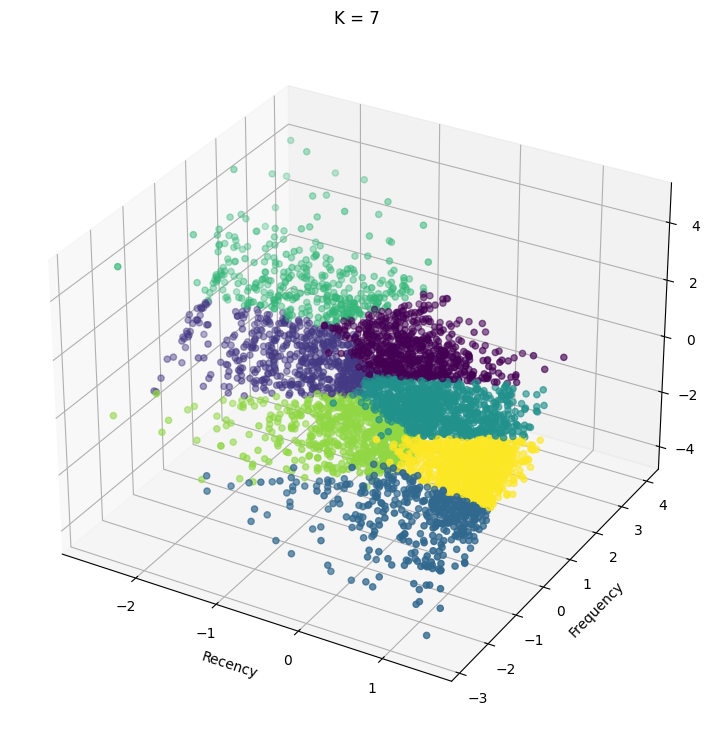

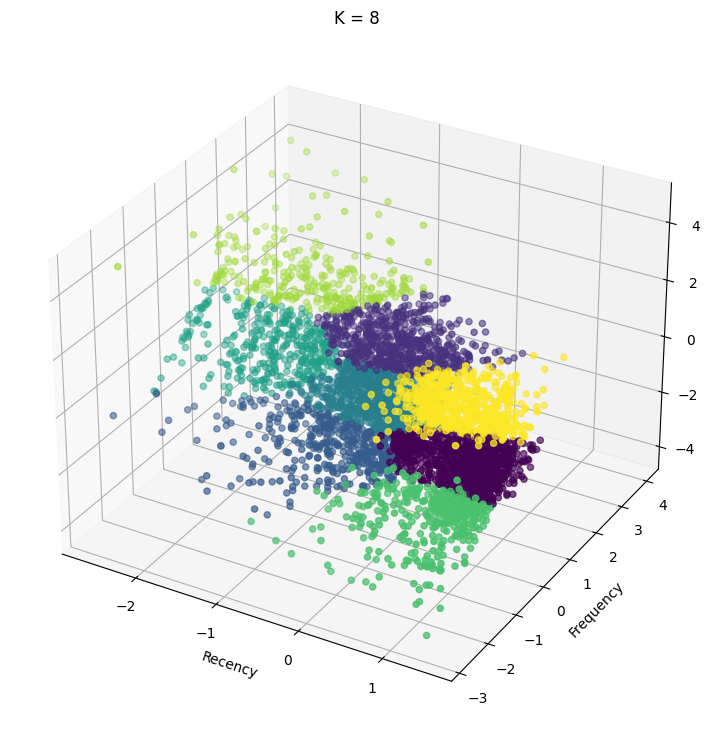

In [56]:
X_scaled = rfm_data_normalized
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k+1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
for k in range (1, K_best+1):
      # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(n_clusters=k, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

    # Note I'm scaling the data to normalize it! Important for good results.
    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
    # And we'll visualize it:

    # Create a 3D figure
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot in 3D
    ax.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], X_scaled.iloc[:,2], c=model.labels_.astype(float))

    # Setting title and labels
    ax.set_title(f'K = {k}')
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')

    plt.show()

### **Silhouette**

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

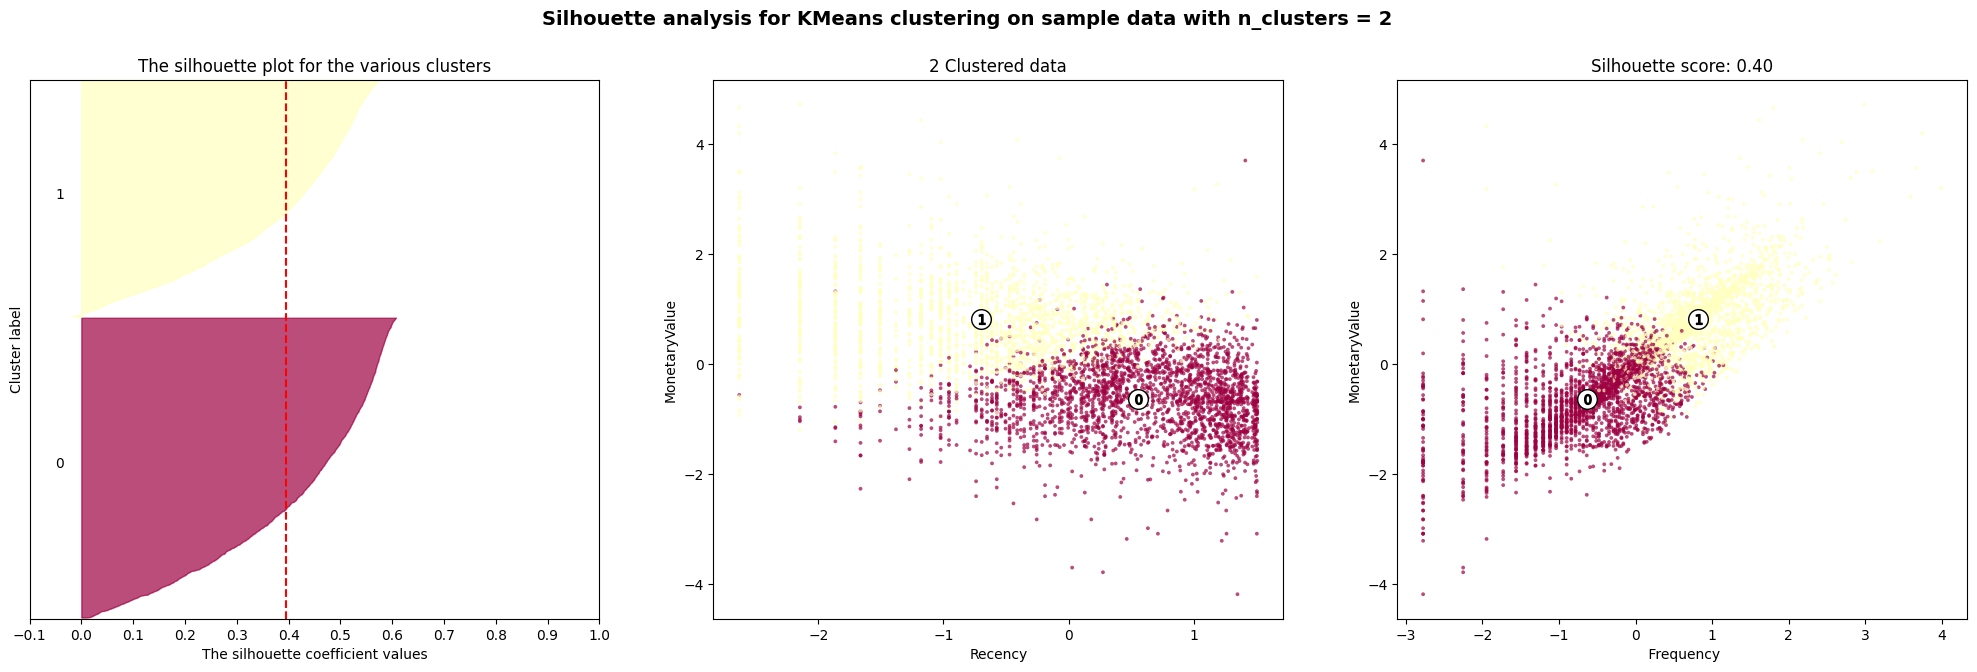

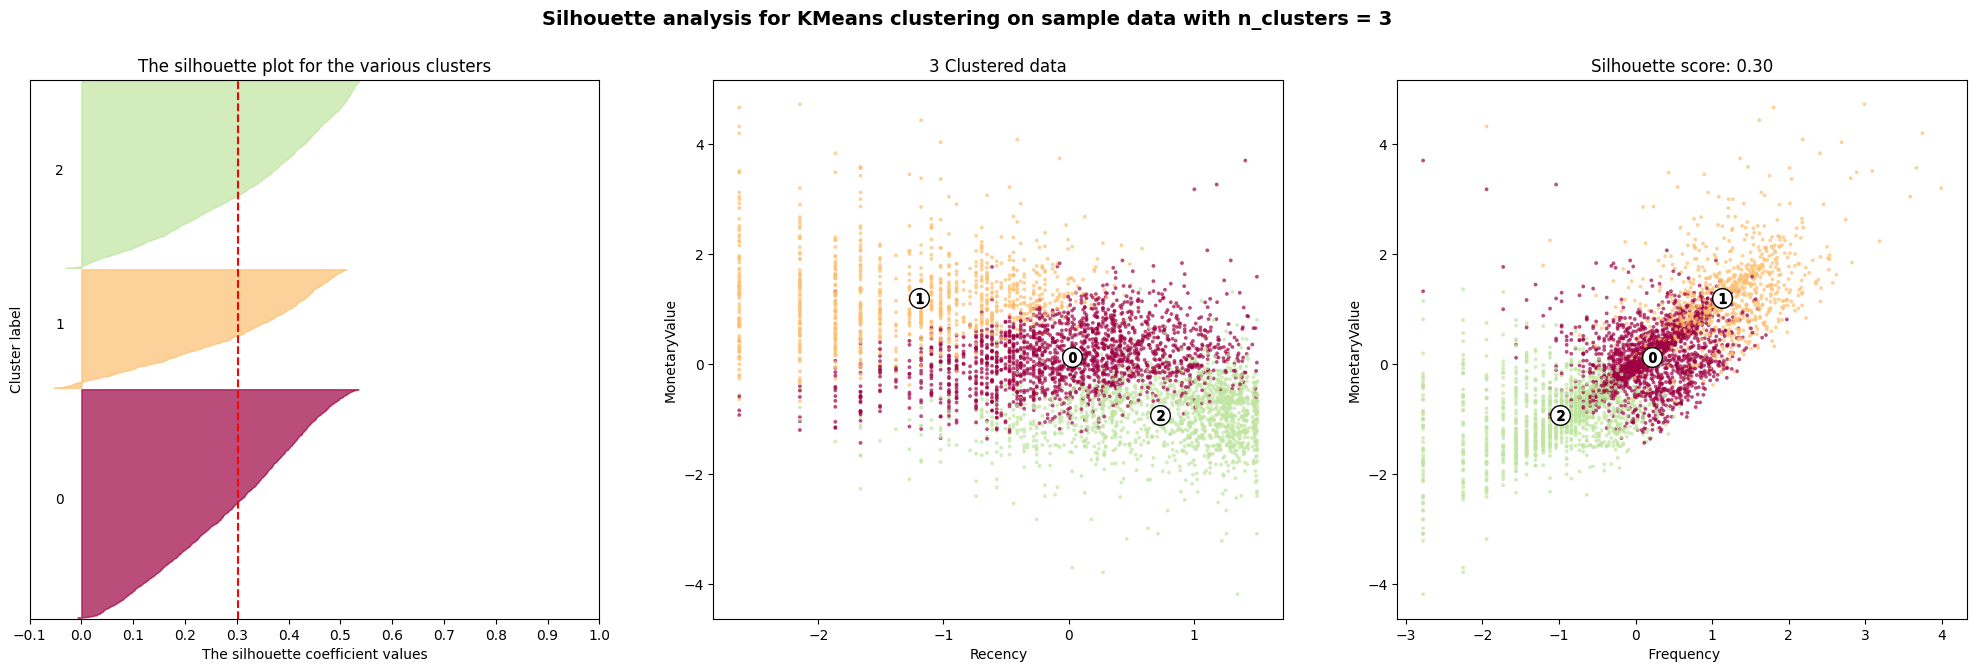

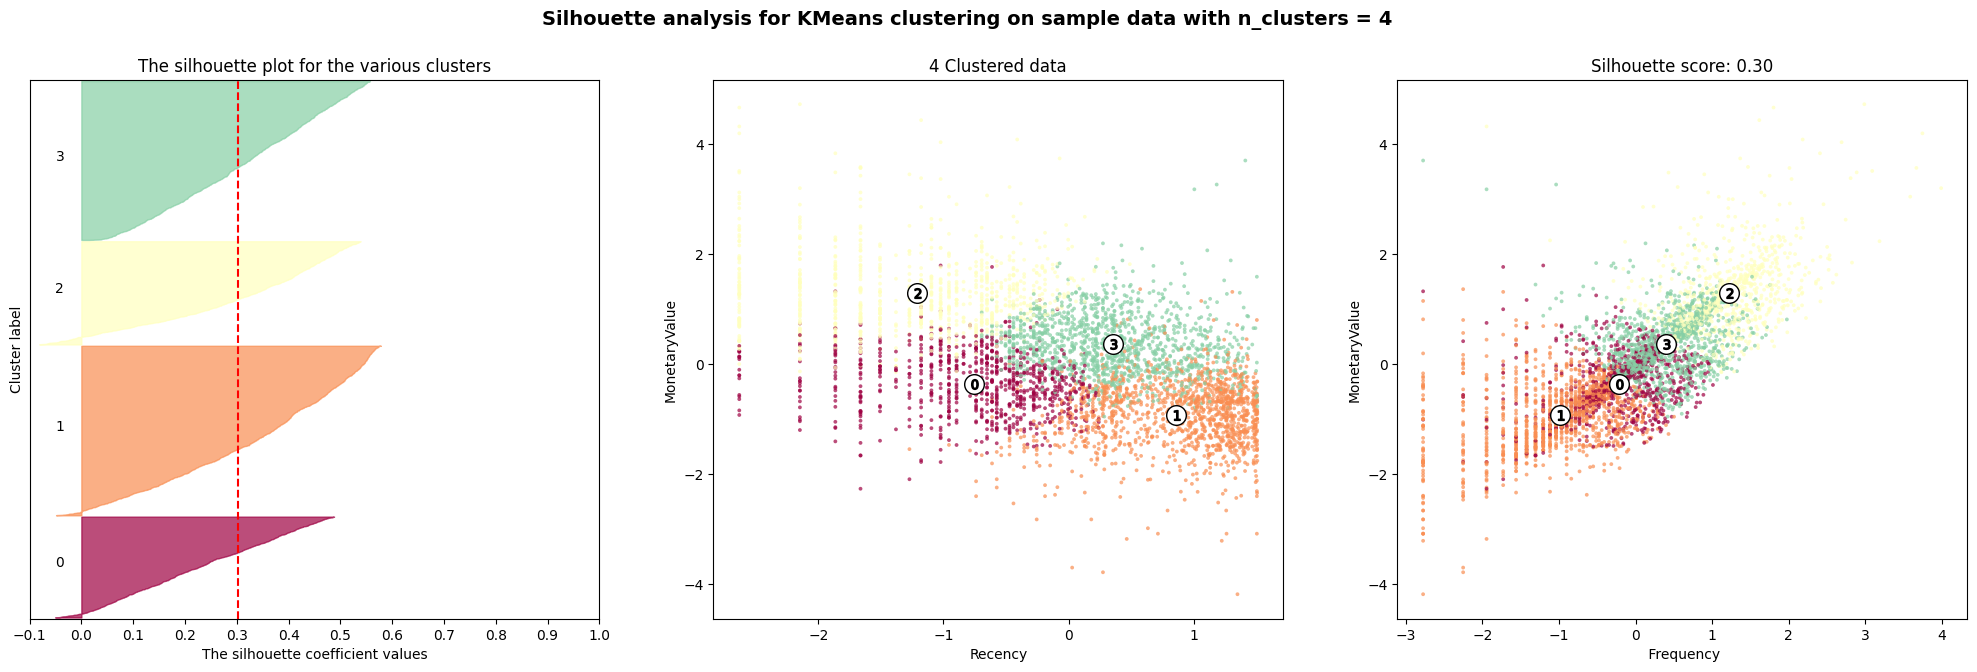

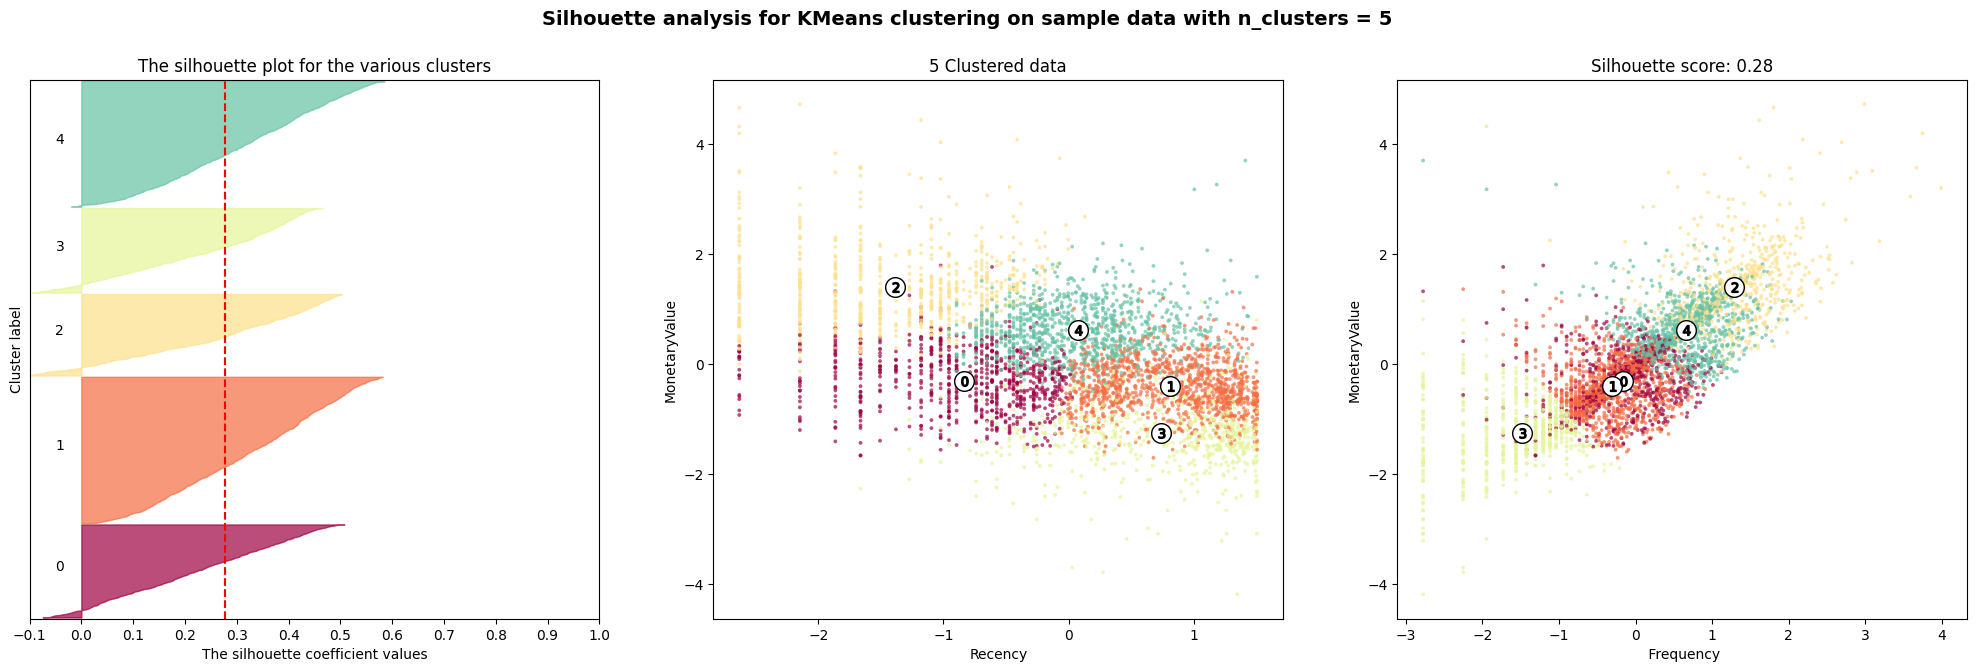

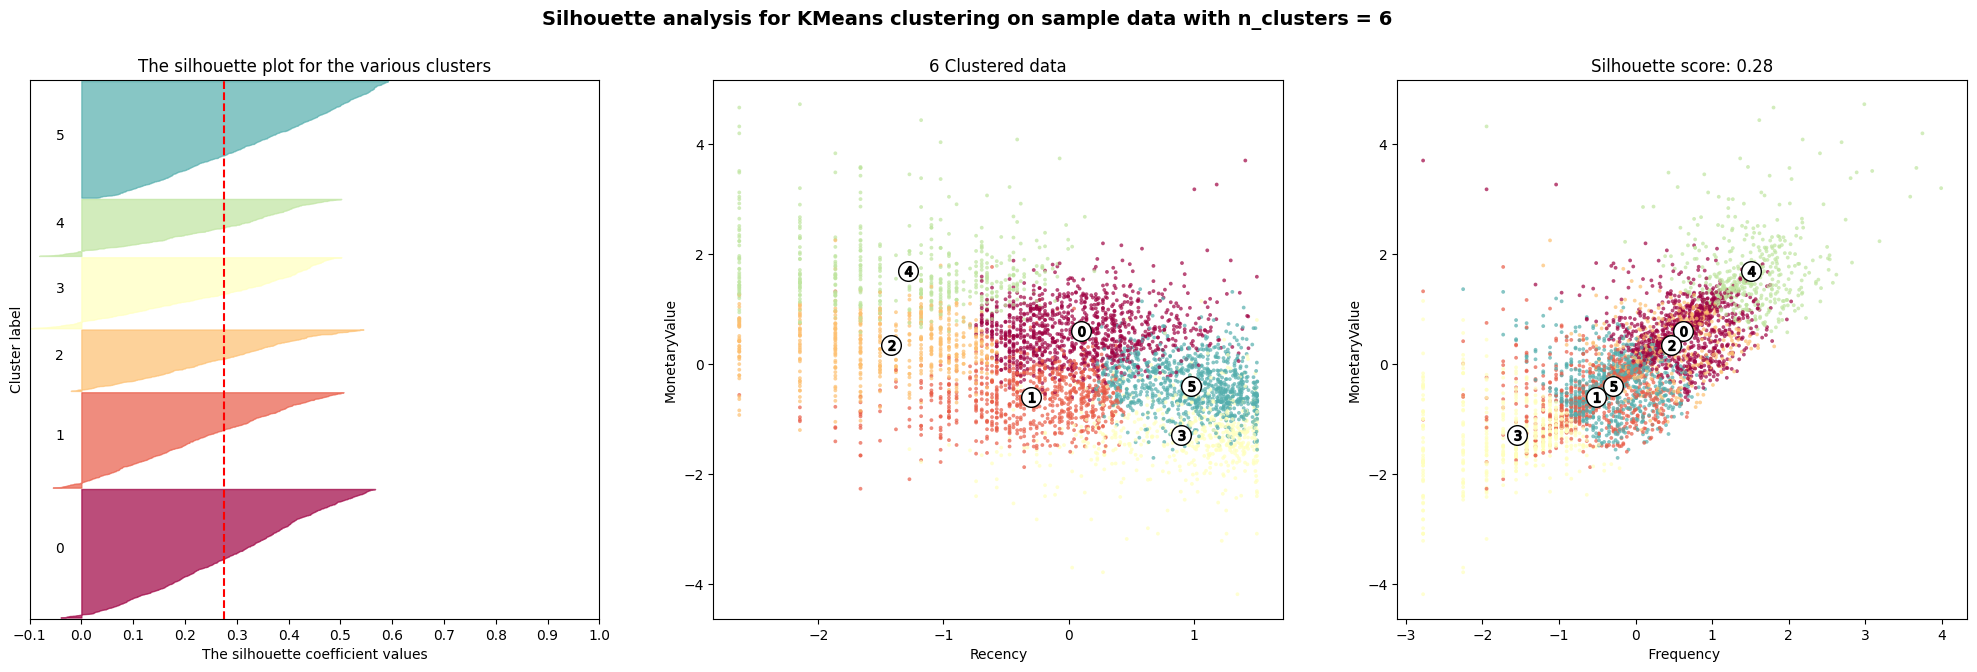

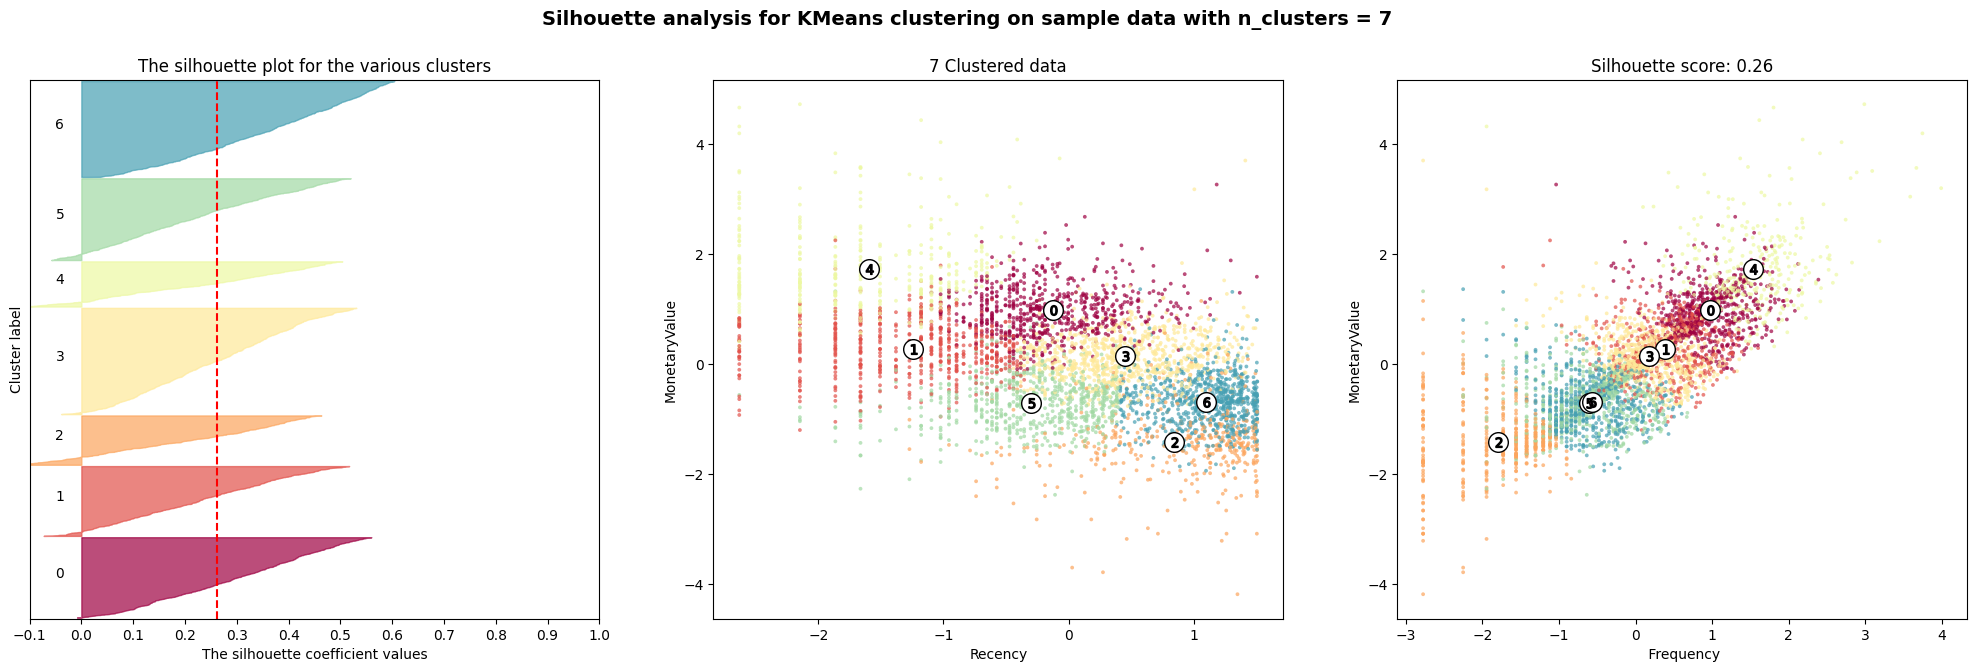

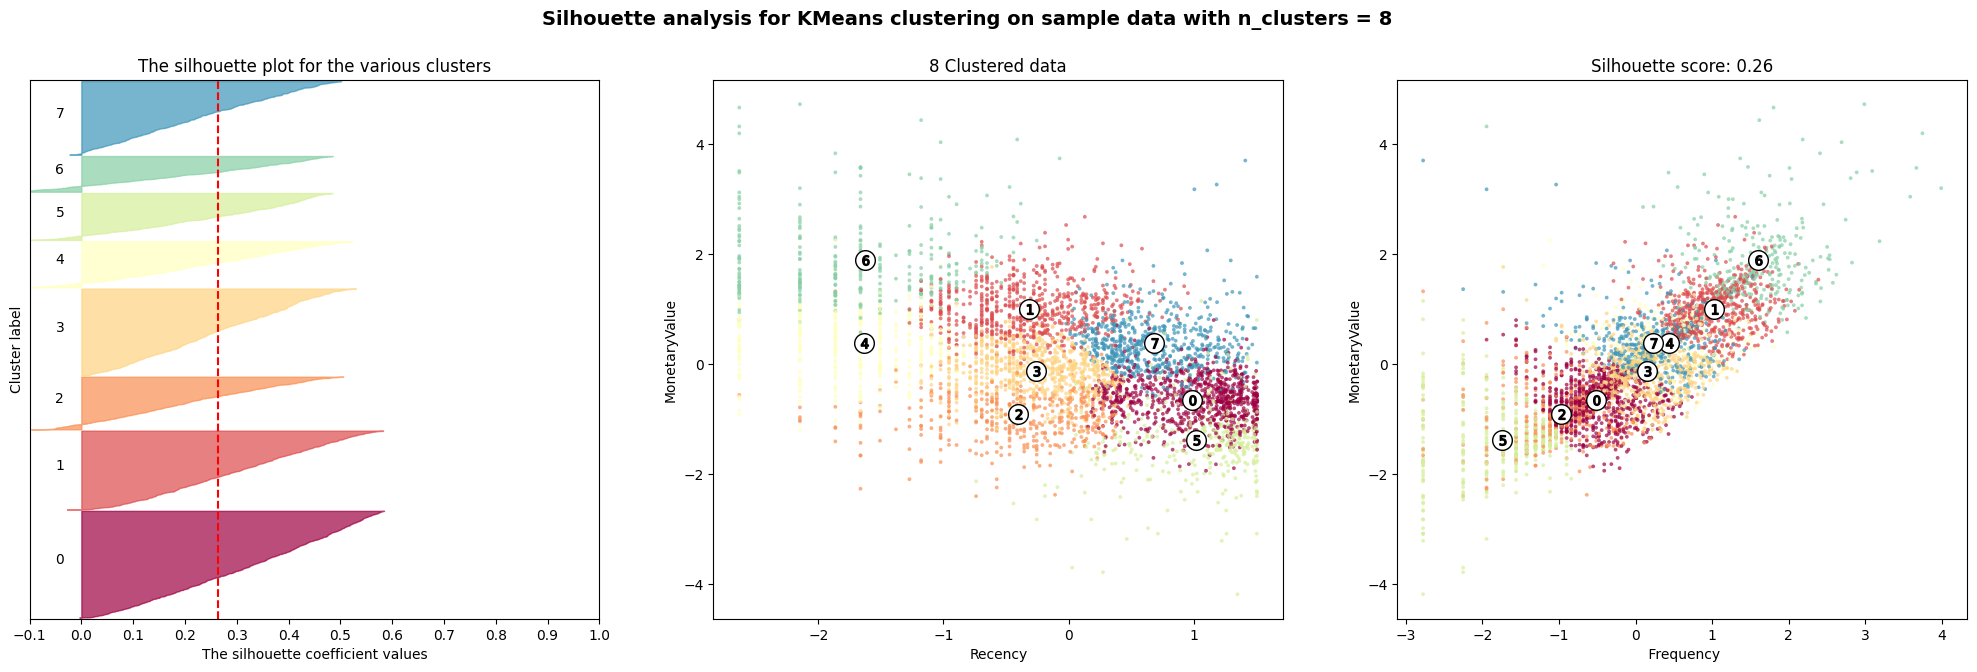

In [58]:
cluster_centers = dict()

for n_clusters in range(2,K_best+1,1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    feature_vector = ['Recency', ' Frequency', 'MonetaryValue']
    y = 2
    x = 0
    ax2.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 1
    ax3.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [59]:
# Import KMeans
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=8, random_state=1)

# Fit k-means clustering on the normalized data set
kmeans.fit(rfm_data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([6, 3, 6, ..., 7, 3, 0], dtype=int32)

In [60]:
# Create a DataFrame by adding a new cluster label column
rfm_data_k8 = rfm_data.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = rfm_data_k8.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouping_rfm = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1).reset_index()

grouping_rfm

Cluster Recency Frequency MonetaryValue      
             mean      mean          mean count
0       0    34.0     179.9        3093.4   660
1       1   201.9      23.1         359.4   875
2       2    31.8      59.3         706.2   683
3       3     6.1     492.6       15425.7   281
4       4   213.0       4.9         185.1   384
5       5     4.9      88.9        1465.1   363
6       6   127.5      62.1        1575.2   636
7       7    31.2      14.0         293.1   456


### **Segmentation**

**Cluster 0**: Loyal Customers #These customers buy regularly and spend at an average level. They frequently purchase

**Cluster 1**: At Risk #These customers have not purchased for a long time and used to be regular, with an average purchase amount and frequency.

**Cluster 2**: Potential Loyalist #These are recent customers with high spending frequency and medium-high purchase amounts.

**Cluster 3**: Champions #These are the most recent and frequent high-spending customers. They are very engaged and likely to perform future purchases.

**Cluster 4**: Hibernating #These customers have not purchased for a long time, with low frequency and amount, and low purchase value.

**Cluster 5**: Promising #These customers have purchased recently with a large purchase amount but low frequency.

**Cluster 6**: Can't Lose Them #These customers have not purchased for a long time and used to be regular, with a high purchase amount and value. You risk losing these customers if no re-engagement actions are taken.

**Cluster 7**: New Customers #These customers have recently purchased, but with lower frequency and amount, and do not shop regularly.

In [61]:
clus_name = ['Loyal Customers', 'At Risk', 'Potential Loyalist', 'Champions', 'Hibernating', 'Promising', 'Can’t Lose Them', 'New Customers']
grouping_rfm['Cluster_name'] = grouping_rfm['Cluster'].map(lambda x: clus_name[x])
grouping_rfm

Cluster Recency Frequency MonetaryValue              Cluster_name
             mean      mean          mean count                    
0       0    34.0     179.9        3093.4   660     Loyal Customers
1       1   201.9      23.1         359.4   875             At Risk
2       2    31.8      59.3         706.2   683  Potential Loyalist
3       3     6.1     492.6       15425.7   281           Champions
4       4   213.0       4.9         185.1   384         Hibernating
5       5     4.9      88.9        1465.1   363           Promising
6       6   127.5      62.1        1575.2   636     Can’t Lose Them
7       7    31.2      14.0         293.1   456       New Customers

In [62]:
clus_name = ['Loyal Customers', 'At Risk', 'Potential Loyalist', 'Champions', 'Hibernating', 'Promising', 'Can’t Lose Them', 'New Customers']
rfm_data_k8['Cluster_name'] = rfm_data_k8['Cluster'].map(lambda x: clus_name[x])
rfm_data_k8.head()

Recency  Frequency  MonetaryValue  Cluster     Cluster_name
CustomerID                                                             
12346           326          1       77183.60        6  Can’t Lose Them
12347             2        182        4310.00        3        Champions
12348            75         31        1797.24        6  Can’t Lose Them
12349            19         73        1757.55        0  Loyal Customers
12350           310         17         334.40        1          At Risk